<a href="https://colab.research.google.com/github/fjoseph631/Machine-Learning/blob/master/Problem_2_HW2_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0


## Underfitting Model


In [0]:
#Under
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

##Overfitting Model

In [0]:
# set up the layers
#Overfit
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

##Proper Fitting Model


In [0]:
#Proper Fit
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.30),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#compiler(model)

## Build the model

In [49]:


#def compiler(model):


# compile the model

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            #loss='binary_crossentropy',
            metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/sample - loss: 1.5283 - acc: 0.4530 - val_loss: 1.1985 - val_acc: 0.5704
Epoch 2/10
60000/60000 [==============================] - 3s 52us/sample - loss: 1.0851 - acc: 0.6192 - val_loss: 1.0247 - val_acc: 0.6343
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.9831 - acc: 0.6342 - val_loss: 0.9685 - val_acc: 0.6296
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.9414 - acc: 0.6350 - val_loss: 0.9403 - val_acc: 0.6345
Epoch 5/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.9172 - acc: 0.6464 - val_loss: 0.9220 - val_acc: 0.6512
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.8941 - acc: 0.6750 - val_loss: 0.8983 - val_acc: 0.6809
Epoch 7/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.8683 - acc: 0.6929 - val_loss: 0.

## Evaluate accuracy

In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.8434 - acc: 0.7079
Test accuracy: 0.7079


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

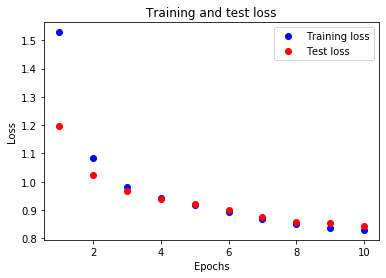

In [55]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

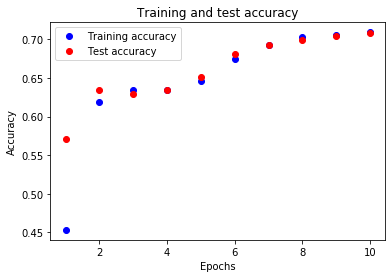

In [57]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()